In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv("oil and gas.csv")

In [31]:


# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Aggregate demand patterns (Monthly & Yearly)
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

# Grouping by month to analyze seasonal trends
monthly_demand = df.groupby(["Year", "Month"])["Volume"].sum().reset_index()
monthly_demand["Date"] = pd.to_datetime(monthly_demand[["Year", "Month"]].assign(DAY=1))


C:\Users\ROSHAN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


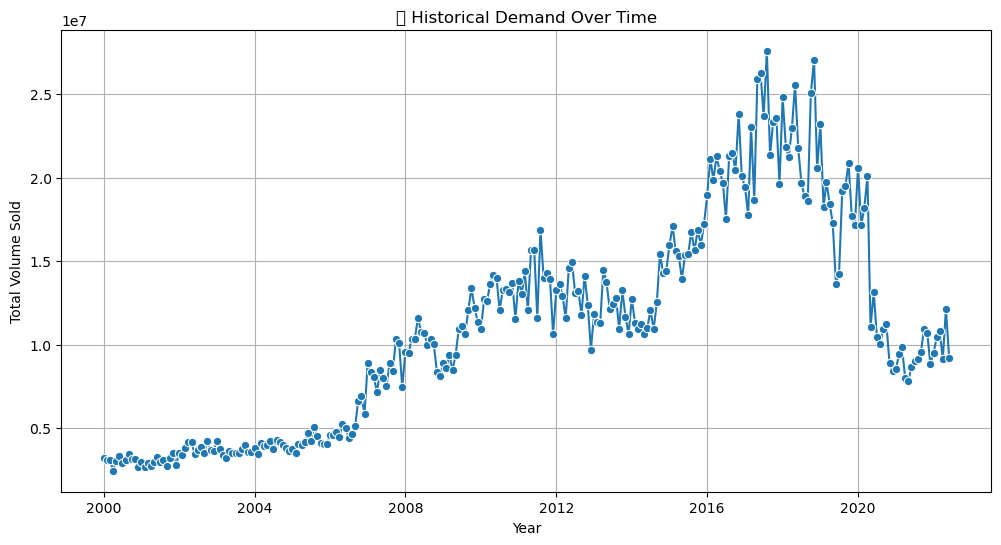

In [33]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_demand, x="Date", y="Volume", marker="o")
plt.title("📊 Historical Demand Over Time")
plt.xlabel("Year")
plt.ylabel("Total Volume Sold")
plt.grid(True)
plt.show()

C:\Users\ROSHAN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


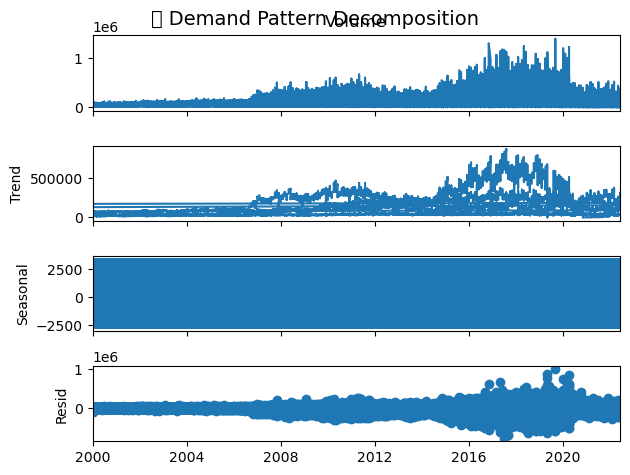

In [35]:
df.set_index("Date", inplace=True)  # Set Date as index
decomposed = seasonal_decompose(df["Volume"], model="additive", period=12)

# Plot trend, seasonality, and residuals
decomposed.plot()
plt.suptitle("📊 Demand Pattern Decomposition", fontsize=14)
plt.show()

C:\Users\ROSHAN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


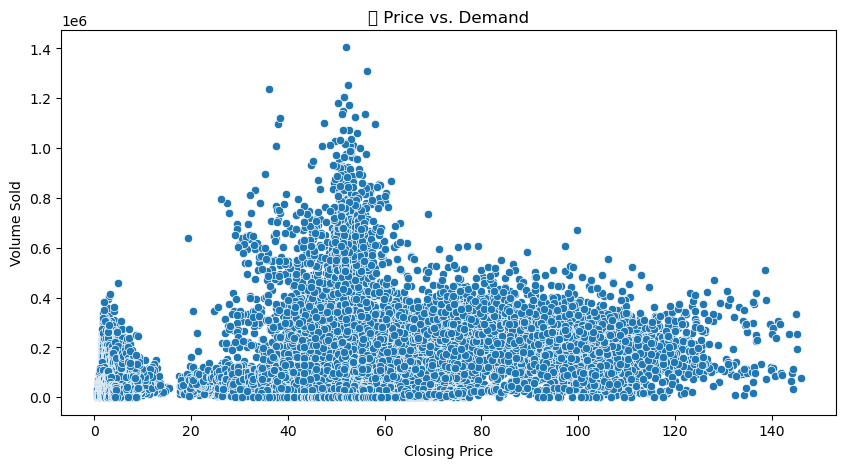

📊 Correlation between Closing Price & Demand: 0.44


In [37]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Close", y="Volume")
plt.title("📉 Price vs. Demand")
plt.xlabel("Closing Price")
plt.ylabel("Volume Sold")
plt.show()

# Correlation value
correlation = df[["Close", "Volume"]].corr().iloc[0, 1]
print(f"📊 Correlation between Closing Price & Demand: {correlation:.2f}")
